## Intro to seismic data

We already made some seismic data, in the sythetic exercise. 

Now we will read a preformed dataset from disk, and have a look at it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
ls ../data/

B-41.las*                L-30_tops.txt            amp_slice.npy
B-41.txt                 Marmousi.sgy             cont.npy
B-41_tops.txt            OLD/                     periods.csv
F3_volume_3x3.npy        R-39.las*                periods.txt
F3_volume_3x3_16bit.npy  R-90.las                 slicing_seismic.txt
F3ss.txt                 Well_A.las               topography.npy
L-30.las*                Well_A_top.txt


In [3]:
volume = np.load('../data/F3_volume_3x3_16bit.npy')

In [4]:
volume.shape

(194, 299, 451)

In [5]:
print('The volume contains {} samples'.format(np.product(volume.shape)))

The volume contains 26160706 samples


In [6]:
print('The data size is {:.1f}MB'.format(2*np.product(volume.shape)/1000000))

The data size is 52.3MB


In [7]:
volume[0, 0, :50]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,  -399,
        -662,   -89,   -85, -1593,  -325,     0,  1984,  1123,   292,
         550,  1640,  2039,   429,  -605,   969,  1863,   869,   415,
        -391,  -140,   648,   263, -1197, -1820, -1753,  -623,   507,
        1155,  -228, -1829,  -946,   661], dtype=int16)

In [8]:
volume.dtype

dtype('int16')

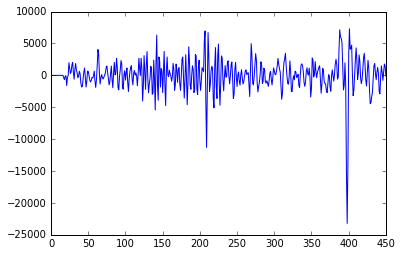

In [9]:
plt.plot(volume[0,0])

In [10]:
ma, mi = np.amax(volume), np.amin(volume)
mi, ma

(-29579, 30439)

In [11]:
np.mean(volume)

-11.626421893965706

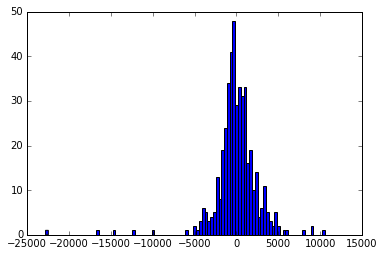

In [13]:
plt.hist(volume[5,5], bins=100)
plt.show()

## Plotting

Let's start with a single trace. 

First we'll make a time basis.

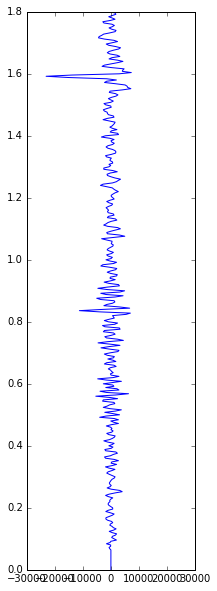

In [95]:
dt = 0.004
maxt = volume.shape[-1] * dt

t = np.arange(0, maxt, dt)

plt.figure(figsize=(3,10))
plt.plot(volume[0,0], t)
plt.xlim(-30000, 30000)
plt.show()

/Users/matt/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in greater


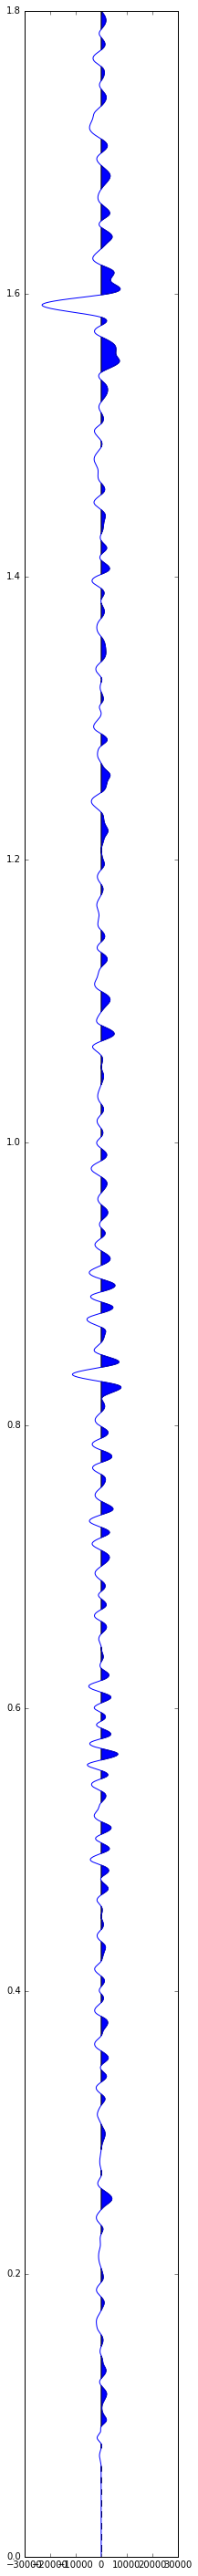

In [96]:
from scipy.interpolate import interp1d

f = interp1d(t, volume[0,0], kind='cubic', bounds_error=False)

t_ = np.arange(0, maxt, 0.0001)
amp = f(t_)

plt.figure(figsize=(3,50))
plt.plot(amp, t_)
plt.fill_betweenx(t_, amp, 0, where=amp>0)
plt.xlim(-30000, 30000)
plt.show()

Plotting multiple traces is almost easier.

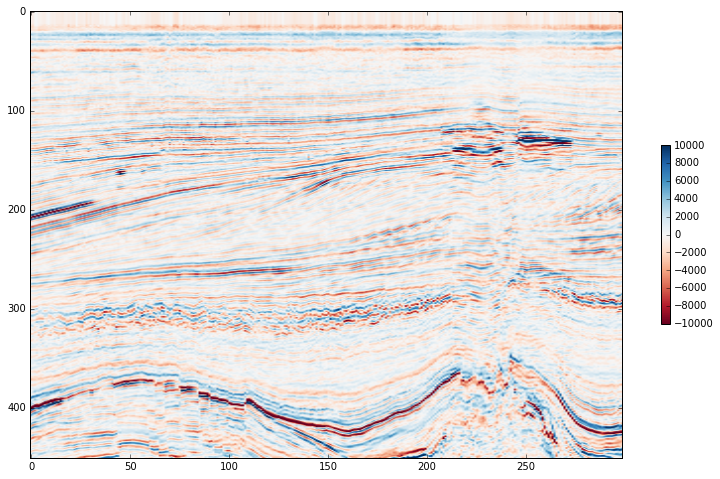

In [108]:
plt.figure(figsize=(14,8))
plt.imshow(volume[5].T, aspect=0.5, cmap="RdBu", clim=[-1e4, 1e4])
plt.colorbar(shrink=0.4)
plt.show()

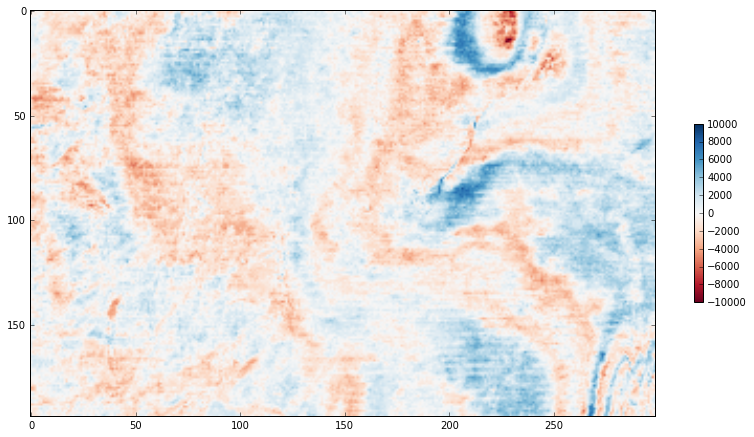

In [110]:
plt.figure(figsize=(14,8))
plt.imshow(volume[:,:,100], cmap="RdBu", clim=[-1e4, 1e4])
plt.colorbar(shrink=0.4)
plt.show()

<hr />

<div>
<img src="https://avatars1.githubusercontent.com/u/1692321?s=50"><p style="text-align:center">© Agile Geoscience 2016</p>
</div>